Homework (8 points, please pay attention to all the words in this orange box):
Ex 17-1：Consider a class with 100 students, if the probability of passing the final exam is p and we
observe 20 students passing the final exam. 

(1) Please find the 95% exact confidence interval for p.
Requirements: please start from making plots to decide the initial values (2 points), and then
define your functions and use our newtonraphson (ftn7, ftn8, etc) (4 points)

In [1]:
newtonraphson <- function(ftn, x0, tol = 1e-9, max.iter = 5000) {
    x <- x0    
    fx <- ftn(x)     
    iter <- 0
    while ((abs(fx[1]) > tol) & (iter < max.iter)) {
        x <- x - fx[1]/fx[2]
        fx <- ftn(x)
        iter <- iter + 1
        }
    if (abs(fx[1]) > tol) {
    cat("Algorithm failed to converge\n")
    return(NULL)
    } else {  # abs(fx[1]) <= tol
    cat("Algorithm converged\n")
    return(x)
    }
}


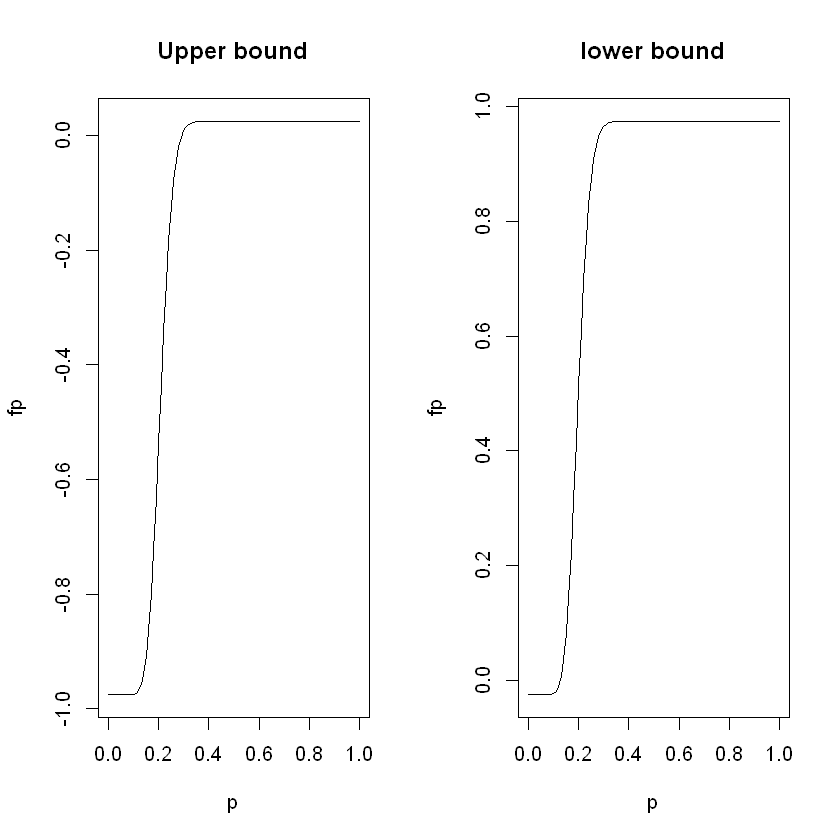

In [2]:
par(mfrow=c(1,2))
#Upper bound
p <- seq(0,1,0.01)
fp <- (-.975)
for (k in 21:100){
    fp <- fp+choose(100,k)*(p^k)*((1-p)^(100-k))
}
plot(p,fp,type="l",main="Upper bound")
#lower bound
p <- seq(0,1,0.01)
fp <- (-.025)
for (k in 20:100){
    fp <- fp+choose(100,k)*(p^k)*((1-p)^(100-k))
}
plot(p,fp,main="lower bound",type="l")

In [23]:
ftn.upper <- function(x){
    fx <- (-0.975)
    dfx <- 0
    for (k in 21:100){
        fx <- fx+choose(100,k)*(x^k)*((1-x)^(100-k))
        dfx <- dfx+choose(100,k)*k*(x^(k-1))*((1-x)^(100-k)) - (x^k)*(100-k)*((1-x)^(99-k))
    }
    return(c(fx,dfx))
}

ftn.lower <- function(x){
    fx <- (-0.025)
    dfx <- 0
    for (k in 20:100){
        fx <- fx+choose(100,k)*(x^k)*((1-x)^(100-k))
        dfx <- dfx+choose(100,k)*k*(x^(k-1))*((1-x)^(100-k)) - (x^k)*(100-k)*((1-x)^(99-k))
    }
    return(c(fx,dfx))
}

Reason of choosing initial value:<br>
<p>
    &emsp;the point can differentiable and the f'(x) isn't 0 (around of 0.2). So I choose 0.2 for the initial point.


&emsp;I give up the iterative process, because the process will affect the typesetting. If you want to check this process, you can check the appendix at the bottom of this assignment.  

In [24]:
newtonraphson(ftn.upper,0.3)

Algorithm converged


[1] 0.2918427

In [25]:
newtonraphson(ftn.lower,0.1)

Algorithm converged


[1] 0.1266556

95% confidence interval:<br>(0.126655,0.291842)

(2) Please find the 95% asymptotic confidence interval for p. (2 points)
(asymptotic: based on the central limit theorem)

In [53]:
find_CI  <- function(x,n){
  p <- x/n
  p_upper = p + qnorm(0.975)*sqrt(p*(1-p)/n)
  p_lower = p - qnorm(0.975)*sqrt(p*(1-p)/n)
  return(cat("95% confidence interval:\n",p_lower,p_upper))
}
find_CI(20,100)

95% confidence interval:
 0.1216014 0.2783986

---
### appendix

In [54]:
library(binom)
binom.confint(20,100,conf.level=0.95,methods="all")

method,x,n,mean,lower,upper
agresti-coull,20,100,0.2000000,0.1326077,0.2895884
asymptotic,20,100,0.2000000,0.1216014,0.2783986
bayes,20,100,0.2029703,0.1272666,0.2819852
cloglog,20,100,0.2000000,0.1283119,0.2832200
exact,20,100,0.2000000,0.1266556,0.2918427
logit,20,100,0.2000000,0.1328161,0.2898107
probit,20,100,0.2000000,0.1310048,0.2871983
profile,20,100,0.2000000,0.1297551,0.2854280
lrt,20,100,0.2000000,0.1297488,0.2854267
prop.test,20,100,0.2000000,0.1292482,0.2943230


In [55]:
newtonraphson <- function(ftn, x0, tol = 1e-9, max.iter = 5000) {
    x <- x0    
    fx <- ftn(x)     
    iter <- 0
    while ((abs(fx[1]) > tol) & (iter < max.iter)) {
        x <- x - fx[1]/fx[2]
        fx <- ftn(x)
        iter <- iter + 1
        cat("At iteration", iter, "value of x is:", x, "\n")
        }
    if (abs(fx[1]) > tol) {
    cat("Algorithm failed to converge\n")
    return(NULL)
    } else {  # abs(fx[1]) <= tol
    cat("Algorithm converged\n")
    return(x)
    }
}
newtonraphson(ftn.lower,0.2)

At iteration 1 value of x is: 0.1916865 
At iteration 2 value of x is: 0.1836736 
At iteration 3 value of x is: 0.175994 
At iteration 4 value of x is: 0.1686839 
At iteration 5 value of x is: 0.1617857 
At iteration 6 value of x is: 0.1553517 
At iteration 7 value of x is: 0.149447 
At iteration 8 value of x is: 0.1441503 
At iteration 9 value of x is: 0.1395482 
At iteration 10 value of x is: 0.1357202 
At iteration 11 value of x is: 0.1327103 
At iteration 12 value of x is: 0.1304974 
At iteration 13 value of x is: 0.1289832 
At iteration 14 value of x is: 0.1280146 
At iteration 15 value of x is: 0.1274284 
At iteration 16 value of x is: 0.1270875 
At iteration 17 value of x is: 0.1268945 
At iteration 18 value of x is: 0.1267869 
At iteration 19 value of x is: 0.1267275 
At iteration 20 value of x is: 0.1266949 
At iteration 21 value of x is: 0.1266771 
At iteration 22 value of x is: 0.1266673 
At iteration 23 value of x is: 0.126662 
At iteration 24 value of x is: 0.1266591 
At i

[1] 0.1266556